# Modeling Your Data - Lab

## Introduction 

In this lab you'll perform a full linear regression analysis on the data. You'll implement the process demonstrated in the previous lesson, taking a stepwise approach to analyze and improve the model along the way.

## Objectives
You will be able to:

* Perform a full linear regression with iterations based on p-value of features and other parameters
* Create visualizations to better understand the distributions of variables in a dataset
* Determine whether or not the assumptions for linear regression hold true for this example

## Build an Initial Regression Model

To start, perform a train-test split and create an initial regression model to model the `list_price` using all of your available features.

> **Note:** In order to write the model you'll have to do some tedious manipulation of your column names. Statsmodels will not allow you to have spaces, apostrophe or arithmetic symbols (+) in your column names. Preview them and refine them as you go.  
**If you receive an error such as "PatsyError: error tokenizing input (maybe an unclosed string?)", then you need to further preprocess your column names.**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split

In [2]:
# Import the dataset 'Lego_dataset_cleaned.csv'
df = pd.read_csv('Lego_dataset_cleaned.csv')
df.head()

,piece_count,list_price,num_reviews,play_star_rating,star_rating,val_star_rating,ages_10+,ages_10-14,ages_10-16,ages_10-21,...,country_NZ,country_PL,country_PT,country_US,review_difficulty_Average,review_difficulty_Challenging,review_difficulty_Easy,review_difficulty_Very Challenging,review_difficulty_Very Easy,review_difficulty_unknown
0,-0.273020,29.99,-0.398512,-0.655279,-0.045687,-0.365010,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1,-0.404154,19.99,-0.398512,-0.655279,0.990651,-0.365010,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,-0.517242,12.99,-0.147162,-0.132473,-0.460222,-0.204063,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,0.635296,99.99,0.187972,-1.352353,0.161581,0.117830,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0.288812,79.99,-0.063378,-2.049427,0.161581,-0.204063,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [3]:
# Your code here - Manipulate column names
subs = [(' ', '_'),('.',''),("'",""),('™', ''), ('®',''),
        ('+','plus'), ('½','half'), ('-','_')
       ]
def col_formatting(col):
    for old, new in subs:
        col = col.replace(old,new)
    return col

df.columns = [col_formatting(col) for col in df.columns]

In [4]:
list(df.columns)

['piece_count',
 'list_price',
 'num_reviews',
 'play_star_rating',
 'star_rating',
 'val_star_rating',
 'ages_10plus',
 'ages_10_14',
 'ages_10_16',
 'ages_10_21',
 'ages_11_16',
 'ages_12plus',
 'ages_12_16',
 'ages_14plus',
 'ages_16plus',
 'ages_1half_3',
 'ages_1half_5',
 'ages_2_5',
 'ages_4plus',
 'ages_4_7',
 'ages_4_99',
 'ages_5plus',
 'ages_5_12',
 'ages_5_8',
 'ages_6plus',
 'ages_6_12',
 'ages_6_14',
 'ages_7plus',
 'ages_7_12',
 'ages_7_14',
 'ages_8plus',
 'ages_8_12',
 'ages_8_14',
 'ages_9plus',
 'ages_9_12',
 'ages_9_14',
 'ages_9_16',
 'theme_name_Angry_Birds',
 'theme_name_Architecture',
 'theme_name_BOOST',
 'theme_name_Blues_Helicopter_Pursuit',
 'theme_name_BrickHeadz',
 'theme_name_Carnotaurus_Gyrosphere_Escape',
 'theme_name_City',
 'theme_name_Classic',
 'theme_name_Creator_3_in_1',
 'theme_name_Creator_Expert',
 'theme_name_DC_Comics_Super_Heroes',
 'theme_name_DC_Super_Hero_Girls',
 'theme_name_DIMENSIONS',
 'theme_name_DUPLO',
 'theme_name_Dilophosaurus_Out

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10870 entries, 0 to 10869
Columns: 103 entries, piece_count to review_difficulty_unknown
dtypes: float64(6), int64(97)
memory usage: 8.5 MB


In [6]:
# Your code here - Define the target and predictors
outcome = 'list_price'
x_cols = list(df.columns)
x_cols.remove(outcome)

In [7]:
# Your code here - Split into train and test
train, test = train_test_split(df)

In [9]:
print(len(train), len(test))

8152 2718


In [10]:
train.head()

,piece_count,list_price,num_reviews,play_star_rating,star_rating,val_star_rating,ages_10plus,ages_10_14,ages_10_16,ages_10_21,...,country_NZ,country_PL,country_PT,country_US,review_difficulty_Average,review_difficulty_Challenging,review_difficulty_Easy,review_difficulty_Very_Challenging,review_difficulty_Very_Easy,review_difficulty_unknown
737,-0.436637,12.1524,-0.426440,-4.140649,-1.082024,-0.365010,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
10663,0.126398,97.5878,-0.286801,0.216064,0.161581,0.117830,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3427,4.120579,274.3800,1.640219,-0.829547,0.161581,0.600671,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9755,-0.368062,28.3929,-0.342657,0.216064,-0.045687,1.244458,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
672,0.990200,119.9900,-0.063378,0.390333,0.161581,0.922564,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0


In [11]:
test.head()

,piece_count,list_price,num_reviews,play_star_rating,star_rating,val_star_rating,ages_10plus,ages_10_14,ages_10_16,ages_10_21,...,country_NZ,country_PL,country_PT,country_US,review_difficulty_Average,review_difficulty_Challenging,review_difficulty_Easy,review_difficulty_Very_Challenging,review_difficulty_Very_Easy,review_difficulty_unknown
4058,-0.335579,24.3878,-0.426440,1.087407,-1.082024,-0.365010,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5400,2.259435,170.7878,0.076261,0.216064,0.783383,0.761617,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8466,-0.297081,45.4870,-0.230945,-0.306741,-1.289292,-0.686904,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6850,0.431977,118.9860,0.634817,-0.306741,-0.252954,0.278777,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2209,0.714698,109.7878,-0.119234,-0.655279,0.576116,0.600671,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [12]:
# Your code here - Fit the actual model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     552.0
Date:                Sun, 08 Dec 2019   Prob (F-statistic):               0.00
Time:                        22:13:12   Log-Likelihood:                -40352.
No. Observations:                8152   AIC:                         8.089e+04
Df Residuals:                    8057   BIC:                         8.156e+04
Df Model:                          94                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           64.3633      1.688     38.139      0.000      61.055      67.671
piece_count                                         75.9932      0.882     86.149      0.000      74.264      77.722
num_reviews                                          6.5662      0.678      9.686      0.000       5.237       7.895
play_star_rating                                     5.3630      0.622      8.617      0.000       4.143       6.583
star_rating                                         -2.1154      0.697     -3.037      0.002      -3.481      -0.750
val_star_rating                                     -8.0010      0.630    -12.697      0.000      -9.236      -6.766
ages_10plus                                        130.0015      6.532     19.901      0.000     117.197     142.806
ages_10_14                                         -22.4624      9.951     -2.257      0.024     -41.969      -2.956
ages_10_16                                         -12.0645      3.859     -3.126      0.002     -19.630      -4.499
ages_10_21                                          47.1181      7.208      6.537      0.000      32.989      61.248
ages_11_16                                         -18.8585      5.671     -3.326      0.001     -29.975      -7.742
ages_12plus                                         71.1193      5.468     13.007      0.000      60.401      81.838
ages_12_16                                         -60.4363      6.322     -9.560      0.000     -72.829     -48.044
ages_14plus                                         24.3223      4.058      5.994      0.000      16.368      32.276
ages_16plus                                         27.1477      5.817      4.667      0.000      15.745      38.550
ages_1half_3                                        -8.8867      2.354     -3.775      0.000     -13.501      -4.272
ages_1half_5                                        -3.2546      2.969     -1.096      0.273      -9.075       2.566
ages_2_5                                            14.5369      1.647      8.825      0.000      11.308      17.766
ages_4plus                                         -18.2766      6.033     -3.029      0.002     -30.103      -6.450
ages_4_7                                            -5.7538      3.669     -1.568      0.117     -12.946       1.439
ages_4_99                                           -2.6280      3.471     -0.757      0.449      -9.432       4.176
ages_5plus                                          -8.9958      3.032     -2.967      0.003     -14.939      -3.052
ages_5_12                                          -34.1806      3.071    -11.131      0.000     -40.200     -28.161
ages_5_8                                 

## Remove the Uninfluential Features

Based on the initial model, remove those features which do not appear to be statistically relevant and rerun the model.

In [13]:
# Your code here - Remove features which do not appear to be statistically relevant
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

103 72
['piece_count', 'num_reviews', 'play_star_rating', 'star_rating', 'val_star_rating']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,64.3633,1.688,38.139,0.000,61.055,67.671
piece_count,75.9932,0.882,86.149,0.000,74.264,77.722
num_reviews,6.5662,0.678,9.686,0.000,5.237,7.895
play_star_rating,5.3630,0.622,8.617,0.000,4.143,6.583
star_rating,-2.1154,0.697,-3.037,0.002,-3.481,-0.750


In [14]:
# Your code here - Refit the model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     731.0
Date:                Sun, 08 Dec 2019   Prob (F-statistic):               0.00
Time:                        22:18:00   Log-Likelihood:                -40362.
No. Observations:                8152   AIC:                         8.087e+04
Df Residuals:                    8080   BIC:                         8.137e+04
Df Model:                          71                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           62.3361      1.517     41.097      0.000      59.363      65.309
piece_count                                         76.0632      0.862     88.285      0.000      74.374      77.752
num_reviews                                          6.6240      0.668      9.913      0.000       5.314       7.934
play_star_rating                                     5.4470      0.604      9.016      0.000       4.263       6.631
star_rating                                         -2.0031      0.679     -2.951      0.003      -3.334      -0.672
val_star_rating                                     -7.9877      0.592    -13.483      0.000      -9.149      -6.826
ages_10plus                                        130.5895      4.807     27.165      0.000     121.166     140.013
ages_10_14                                         -17.8969     10.342     -1.730      0.084     -38.171       2.377
ages_10_16                                          -8.3150      3.702     -2.246      0.025     -15.572      -1.057
ages_10_21                                          46.2259      3.156     14.649      0.000      40.040      52.412
ages_11_16                                         -15.5159      5.523     -2.809      0.005     -26.343      -4.689
ages_12plus                                         74.0282      5.992     12.355      0.000      62.283      85.773
ages_12_16                                         -56.4286      6.666     -8.466      0.000     -69.495     -43.362
ages_14plus                                         28.6793      4.709      6.090      0.000      19.448      37.910
ages_16plus                                         30.8084      6.562      4.695      0.000      17.946      43.671
ages_1half_3                                        -1.3113      3.023     -0.434      0.664      -7.237       4.614
ages_2_5                                            21.7954      1.921     11.349      0.000      18.031      25.560
ages_4plus                                         -16.8527      9.244     -1.823      0.068     -34.973       1.267
ages_5plus                                          -7.1578      2.979     -2.403      0.016     -12.998      -1.318
ages_5_12                                          -29.1754      2.632    -11.083      0.000     -34.335     -24.015
ages_6plus                                         -20.7181      5.488     -3.775      0.000     -31.475      -9.961
ages_6_12                                          -15.4154      1.825     -8.448      0.000     -18.992     -11.838
ages_7_12                                          -14.1333      2.142     -6.600      0.000     -18.331      -9.935
ages_7_14                                

> **Comment:** You should see that the model performance is identical. Additionally, observe that there are further features which have been identified as unimpactful. Continue to refine the model accordingly.

In [15]:
# Your code here - Continue to refine the model
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

73 66
['piece_count', 'num_reviews', 'play_star_rating', 'star_rating', 'val_star_rating']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,62.3361,1.517,41.097,0.000,59.363,65.309
piece_count,76.0632,0.862,88.285,0.000,74.374,77.752
num_reviews,6.6240,0.668,9.913,0.000,5.314,7.934
play_star_rating,5.4470,0.604,9.016,0.000,4.263,6.631
star_rating,-2.0031,0.679,-2.951,0.003,-3.334,-0.672


In [16]:
# Your code here - Refit the model
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     797.7
Date:                Sun, 08 Dec 2019   Prob (F-statistic):               0.00
Time:                        22:19:58   Log-Likelihood:                -40368.
No. Observations:                8152   AIC:                         8.087e+04
Df Residuals:                    8086   BIC:                         8.133e+04
Df Model:                          65                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           62.7358      1.347     46.573      0.000      60.095      65.376
piece_count                                         76.1057      0.861     88.355      0.000      74.417      77.794
num_reviews                                          6.2464      0.627      9.968      0.000       5.018       7.475
play_star_rating                                     5.5785      0.602      9.273      0.000       4.399       6.758
star_rating                                         -2.1064      0.676     -3.116      0.002      -3.432      -0.781
val_star_rating                                     -8.0197      0.591    -13.571      0.000      -9.178      -6.861
ages_10plus                                        131.2109      4.766     27.532      0.000     121.869     140.553
ages_10_16                                          -7.3440      3.648     -2.013      0.044     -14.494      -0.194
ages_10_21                                          46.6172      3.108     15.001      0.000      40.526      52.709
ages_11_16                                         -14.5615      5.493     -2.651      0.008     -25.330      -3.794
ages_12plus                                         75.1027      5.967     12.587      0.000      63.407      86.799
ages_12_16                                         -55.0307      6.634     -8.295      0.000     -68.036     -42.025
ages_14plus                                         30.7654      4.632      6.642      0.000      21.685      39.846
ages_16plus                                         33.0902      6.501      5.090      0.000      20.347      45.833
ages_2_5                                            22.2754      1.834     12.143      0.000      18.679      25.871
ages_5plus                                          -6.9268      2.967     -2.335      0.020     -12.743      -1.111
ages_5_12                                          -28.6365      2.568    -11.151      0.000     -33.670     -23.603
ages_6plus                                         -19.9577      5.459     -3.656      0.000     -30.659      -9.257
ages_6_12                                          -14.8127      1.726     -8.584      0.000     -18.195     -11.430
ages_7_12                                          -13.5375      2.058     -6.577      0.000     -17.572      -9.503
ages_7_14                                          -10.5370      1.834     -5.744      0.000     -14.133      -6.941
ages_8plus                                          14.0379      4.261      3.295      0.001       5.686      22.390
ages_8_12                                          -12.0506      2.654     -4.540      0.000     -17.253      -6.848
ages_8_14                                

## Investigate Multicollinearity

There are still a lot of features in the current model! Chances are there are some strong multicollinearity issues. Begin to investigate the extent of this problem.

In [17]:
# Your code here - Code a way to identify multicollinearity
X = df[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/stats/outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


[('piece_count', 4.504127785418555),
 ('num_reviews', 2.576316025318851),
 ('play_star_rating', 2.429656946613393),
 ('star_rating', 3.1823076966659345),
 ('val_star_rating', 2.3842087587173606),
 ('ages_10plus', 7.154460075075434),
 ('ages_10_16', 1.1793813599313498),
 ('ages_10_21', 1.0571924883044983),
 ('ages_11_16', 1.1618911464564825),
 ('ages_12plus', 6.263285944874696),
 ('ages_12_16', 1.2022930767623645),
 ('ages_14plus', 2.2166282250014064),
 ('ages_16plus', 9.48281640300776),
 ('ages_2_5', 1.2078869013206703),
 ('ages_5plus', inf),
 ('ages_5_12', 3.2486765191641123),
 ('ages_6plus', 2.669224908909314),
 ('ages_6_12', 1.9406171963185153),
 ('ages_7_12', 1.4922103234854847),
 ('ages_7_14', 1.957739780219315),
 ('ages_8plus', 2.586062445398761),
 ('ages_8_12', 1.2801813062947631),
 ('ages_8_14', 2.0149903577735753),
 ('ages_9plus', 1.4099045368617722),
 ('ages_9_12', 1.0209760936729946),
 ('ages_9_14', 1.9037488672915477),
 ('theme_name_Architecture', 5.256391880473187),
 ('the

## Perform Another Round of Feature Selection

Once again, subset your features based on your findings above. Then rerun the model once again.

In [18]:
# Your code here - Subset features based on multicollinearity
vif_scores = list(zip(x_cols, vif))
x_cols = [x for x,vif in vif_scores if vif < 5]
print(len(vif_scores), len(x_cols))

66 59


In [19]:
# Your code here - Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     782.4
Date:                Sun, 08 Dec 2019   Prob (F-statistic):               0.00
Time:                        22:24:05   Log-Likelihood:                -40776.
No. Observations:                8152   AIC:                         8.167e+04
Df Residuals:                    8092   BIC:                         8.209e+04
Df Model:                          59                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           65.6056      1.140     57.544      0.000      63.371      67.840
piece_count                                         77.4706      0.687    112.717      0.000      76.123      78.818
num_reviews                                          5.0782      0.616      8.249      0.000       3.871       6.285
play_star_rating                                     7.0621      0.553     12.767      0.000       5.978       8.146
star_rating                                         -2.6763      0.686     -3.903      0.000      -4.021      -1.332
val_star_rating                                     -9.5584      0.616    -15.520      0.000     -10.766      -8.351
ages_10_16                                         -14.7195      3.567     -4.127      0.000     -21.712      -7.728
ages_10_21                                          43.1999      3.208     13.466      0.000      36.911      49.488
ages_11_16                                         -25.0668      5.393     -4.648      0.000     -35.638     -14.496
ages_12_16                                         -67.9175      6.433    -10.557      0.000     -80.528     -55.307
ages_14plus                                          9.5825      3.952      2.425      0.015       1.836      17.329
ages_2_5                                            19.6310      1.798     10.920      0.000      16.107      23.155
ages_5_12                                          -32.7075      2.630    -12.435      0.000     -37.863     -27.552
ages_6plus                                         -24.2508      5.685     -4.266      0.000     -35.395     -13.106
ages_6_12                                          -20.4698      1.658    -12.347      0.000     -23.720     -17.220
ages_7_12                                          -18.1218      2.034     -8.908      0.000     -22.110     -14.134
ages_7_14                                          -15.5588      1.794     -8.674      0.000     -19.075     -12.042
ages_8plus                                           1.7973      4.377      0.411      0.681      -6.782      10.377
ages_8_12                                          -17.0121      2.602     -6.538      0.000     -22.113     -11.911
ages_8_14                                          -16.3051      1.878     -8.683      0.000     -19.986     -12.624
ages_9plus                                          16.2016     10.354      1.565      0.118      -4.095      36.499
ages_9_12                                          -26.2687      6.498     -4.043      0.000     -39.007     -13.531
ages_9_14                                          -16.1028      2.534     -6.355      0.000     -21.070     -11.136
theme_name_BOOST                         

## Check the Normality Assumption

Check whether the normality assumption holds for your model.

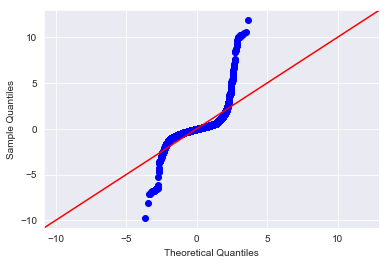

In [20]:
# Your code here - Check that the residuals are normally distributed
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

## Check Homoscedasticity Assumption

Check whether the model's errors are indeed homoscedastic or if they violate this principle and display heteroscedasticity.

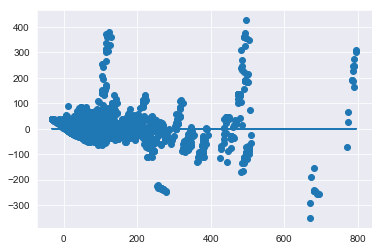

In [21]:
# Your code here - Check that the residuals are homoscedastic
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

> **Comment:** This displays a fairly pronounced 'funnel' shape: errors appear to increase as the `list_price` increases. This doesn't bode well for our model. Subsetting the data to remove outliers and confining the model to this restricted domain may be necessary. A log transformation or something equivalent may also be appropriate.

## Make Additional Refinements

From here, make additional refinements to your model based on the above analysis. As you progress, continue to go back and check the assumptions for the updated model. Be sure to attempt at least two additional model refinements.

> **Comment:** Based on the above plots, it seems as though outliers are having a substantial impact on the model. As such, removing outliers may be appropriate. Investigating the impact of a log transformation is also worthwhile.

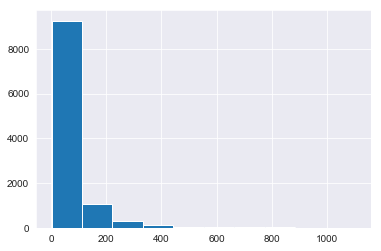

In [22]:
# Your code here - Check for outliers
df.list_price.hist()

In [23]:
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q, df.list_price.quantile(q=q)))

0.8 percentile: 90.986
0.81 percentile: 92.66216100000052
0.82 percentile: 97.5878
0.83 percentile: 101.898
0.84 percentile: 109.13971199999885
0.85 percentile: 110.352
0.86 percentile: 119.96492
0.87 percentile: 121.9878
0.88 percentile: 121.9878
0.89 percentile: 134.18779999999998
0.9 percentile: 143.952
0.91 percentile: 153.986
0.92 percentile: 170.7878
0.93 percentile: 182.9878
0.94 percentile: 198.7929
0.95 percentile: 220.03032999999942
0.96 percentile: 251.90543999999994
0.97 percentile: 292.7878
0.98 percentile: 359.88
0.99 percentile: 463.5878


In [24]:
# Your code here
# Remove extreme outliers
orig_tot = len(df)
df = df[df.list_price < 450] # Subsetting to remove extreme outliers
print('Percent removed:', (orig_tot -len(df))/orig_tot)
df.list_price = df.list_price.map(np.log) # Applying a log transformation
train, test = train_test_split(df)

# Rerun the model
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

Percent removed: 0.010487580496780129


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     452.6
Date:                Sun, 08 Dec 2019   Prob (F-statistic):               0.00
Time:                        22:28:15   Log-Likelihood:                -4714.6
No. Observations:                8067   AIC:                             9549.
Df Residuals:                    8007   BIC:                             9969.
Df Model:                          59                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                            3.3336      0.014    235.339      0.000       3.306       3.361
piece_count                                          0.5995      0.010     60.558      0.000       0.580       0.619
num_reviews                                         -0.0142      0.007     -1.901      0.057      -0.029       0.000
play_star_rating                                     0.1103      0.007     16.422      0.000       0.097       0.123
star_rating                                         -0.0440      0.008     -5.238      0.000      -0.060      -0.028
val_star_rating                                     -0.1252      0.007    -16.824      0.000      -0.140      -0.111
ages_10_16                                           0.6671      0.045     14.959      0.000       0.580       0.755
ages_10_21                                           0.7030      0.040     17.744      0.000       0.625       0.781
ages_11_16                                           0.3256      0.067      4.883      0.000       0.195       0.456
ages_12_16                                           0.0492      0.082      0.598      0.550      -0.112       0.210
ages_14plus                                          0.4743      0.050      9.456      0.000       0.376       0.573
ages_2_5                                             0.5513      0.022     25.154      0.000       0.508       0.594
ages_5_12                                           -0.7009      0.031    -22.334      0.000      -0.762      -0.639
ages_6plus                                          -0.8632      0.070    -12.366      0.000      -1.000      -0.726
ages_6_12                                           -0.1075      0.020     -5.369      0.000      -0.147      -0.068
ages_7_12                                            0.1751      0.025      7.095      0.000       0.127       0.224
ages_7_14                                            0.0564      0.022      2.599      0.009       0.014       0.099
ages_8plus                                           0.5844      0.054     10.862      0.000       0.479       0.690
ages_8_12                                            0.3392      0.032     10.634      0.000       0.277       0.402
ages_8_14                                            0.4040      0.023     17.859      0.000       0.360       0.448
ages_9plus                                           0.1547      0.121      1.275      0.202      -0.083       0.393
ages_9_12                                            0.4805      0.079      6.113      0.000       0.326       0.635
ages_9_14                                            0.5443      0.031     17.394      0.000       0.483       0.606
theme_name_BOOST                         

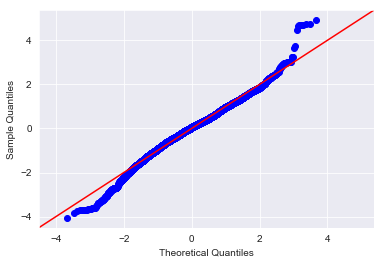

In [25]:
# Your code here - Check normality assumption
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

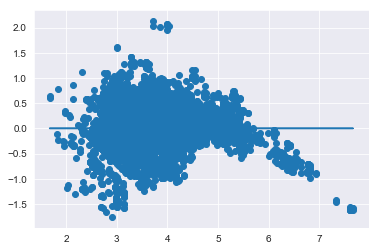

In [26]:
# Your code here - Check the Homoscedasticity Assumption
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

In [ ]:
# Your code goes here

## Summary

Well done! As you can see, regression can be a challenging task that requires you to make decisions along the way, try alternative approaches, and make ongoing refinements. These choices depend on the context and specific use cases. 